# Gereksinimler

Bu derste kullanacağımız kimi paketleri aşağıda bulabilirsiniz:

1. **Scikit-learn**: Kolay bir API'a sahip bir makine öğrenme kütüphanesi (http://scikit-learn.org/stable/). 
2. **Pandas**: Veri analizi ve yapıları için kullanılan bir kütüphane (dataframe) (http://pandas.pydata.org/). 
3. **NumPy**: Bilimsel hesaplama kütüphanesi (http://www.numpy.org/).
4. **Scikit-image**: Resim işleme kütüphanesi (http://scikit-image.org/).
5. **matplotlib**: Grafik çizdirme kütüphanesi (http://matplotlib.org/).
6. **Seaborn**: matplotlib temelli ama görselliği daha güçlü bir grafik kütüphanesi (https://web.stanford.edu/~mwaskom/software/seaborn/).

Bu paketler ve daha fazlası Anacaonda ile yüklü olarak gelmektedir. Anaconda 3.5 versiyonu tensorflow ile de çalıştığı için ben bu versiyonu kullandım. Anaconda'yı indirmek için: (https://www.continuum.io/).

Dokümanları görmek ve üzerinde çalışmak için Jupyter Notebook kullanacağız. Bu da etkileşimli bir hesaplama ortamı. Kod ve yorum yazmak mümkün. Örnek notebooklar için linke bakabilirsiniz: http://nbviewer.jupyter.org/.

Jupyter Notebook'a giriş için linki ziyaret edebilirsiniz:  http://nbviewer.jupyter.org/github/ipython/ipython/blob/4.0.x/examples/Notebook/Notebook%20Basics.ipynb

In [2]:
# Package for scientific computation
import numpy as np

# This allows us to visualize plots in the notebook and not as a separate window.
%matplotlib inline
#Package for plotting
import matplotlib.pyplot as plt
plt.style.use('classic')

#In order to generate artificial clustering datasets
from sklearn.datasets import make_blobs

#vKmeans algorithm for clustering
from sklearn.cluster import KMeans

# Güdümsüz Öğrenme

Güdümsüz öğrenmede amaç veride olduğu düşünülen gizli örüntüleri ve yapıları ortaya çıkarmaktır. Verideki gözlemlerin hangi kümeye bağlı olmadığı bilinmediği gibi kümelerin var olup olmadığı da bilinmemektedir. Amaç gözlemleri kümelere ayırmak ve bu sayede birbirine benzeyen kümeler oluşturmaktır. 

Aşağıda ilk kümeleme çalışmamız için 3 merkezden oluşan bir veri seti oluşturalım ve bu veri setini scatter plot şeklinde görselleştirelim.

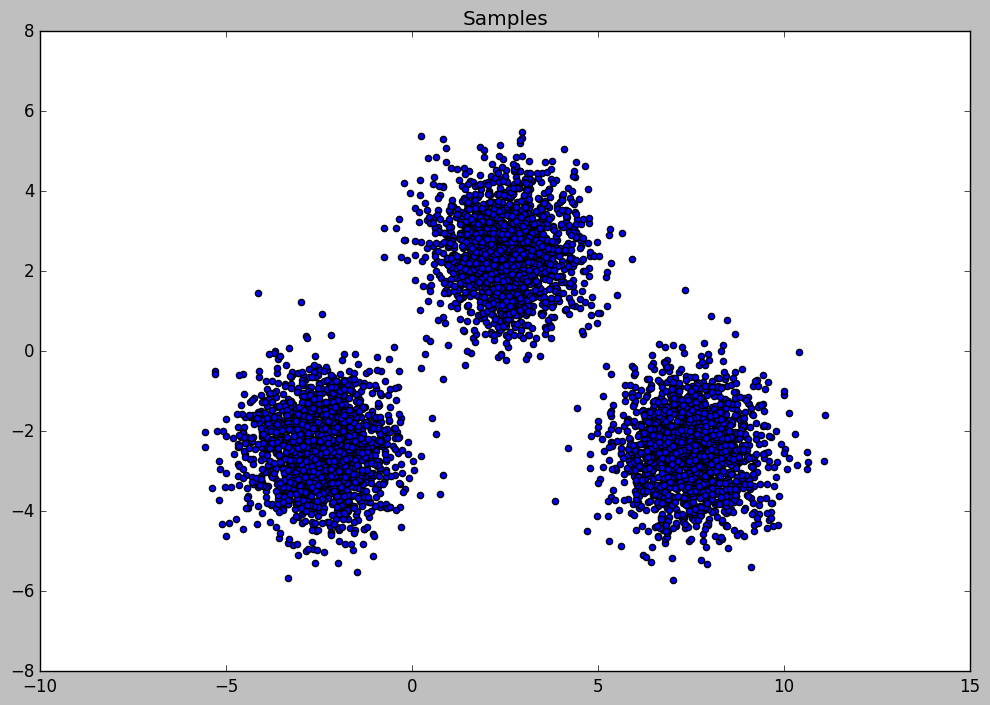

In [3]:
# We create a data set using 5000 observations. The dataset has 3 clusters, for which we provide the centers.
# We use make_blobs in order to create the artificial dataset.
n_samples = 5000
centers = [(-2.5, -2.5), (2.5, 2.5), (7.5, -2.5)]
X,y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0, centers=centers, random_state=1)

plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Samples")
plt.show()

Veri seti üzerinde ilk kümele çalışmasını gerçekleştirelim.

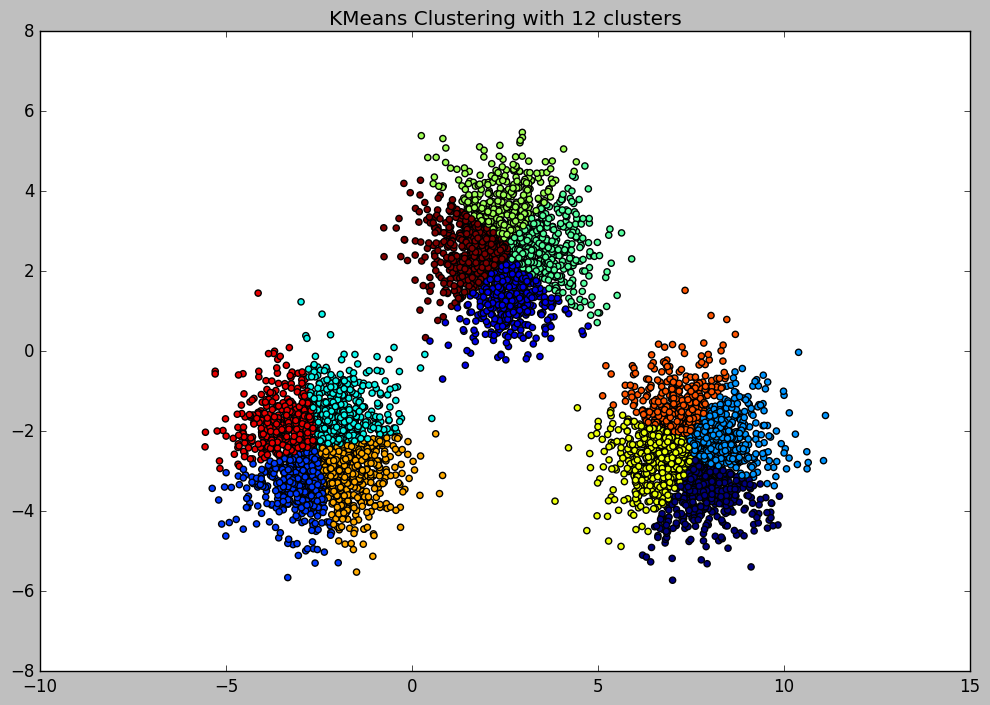

In [5]:
# We create a k-Means model and train it using dataset we just created.
# We run the algorithm using 10 different initialization in order to obtain better results.
kmeans = KMeans(.....................)
# This is the labels that we obtain with KMeans algorithm.
# We also could have used the following lines
"""
kmeans.fit(X)
cluster_labels = kmeans.predict(X)
"""
cluster_labels= kmeans.................
# We plot the dataset (as a scatter plot) and each observation is colored by its cluster number.
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)
plt.title("KMeans Clustering with %2i clusters" % 12)
plt.show()

Güdümsüz öğrenme ile ilgili en büyük sıkıntı küme sayısının belirlenmesidir. Örnekte de gördüğümüz gibi küme sayısı ne olursa olsun bir sonuç elde ettiğimiz için yöntemleri kullanmak kadar sonuçları yorumlamak da önemlidir.

Şimdi kümelemeyi doğru küme sayısı ile yapıp karar sınırlarını görselleştirelim.

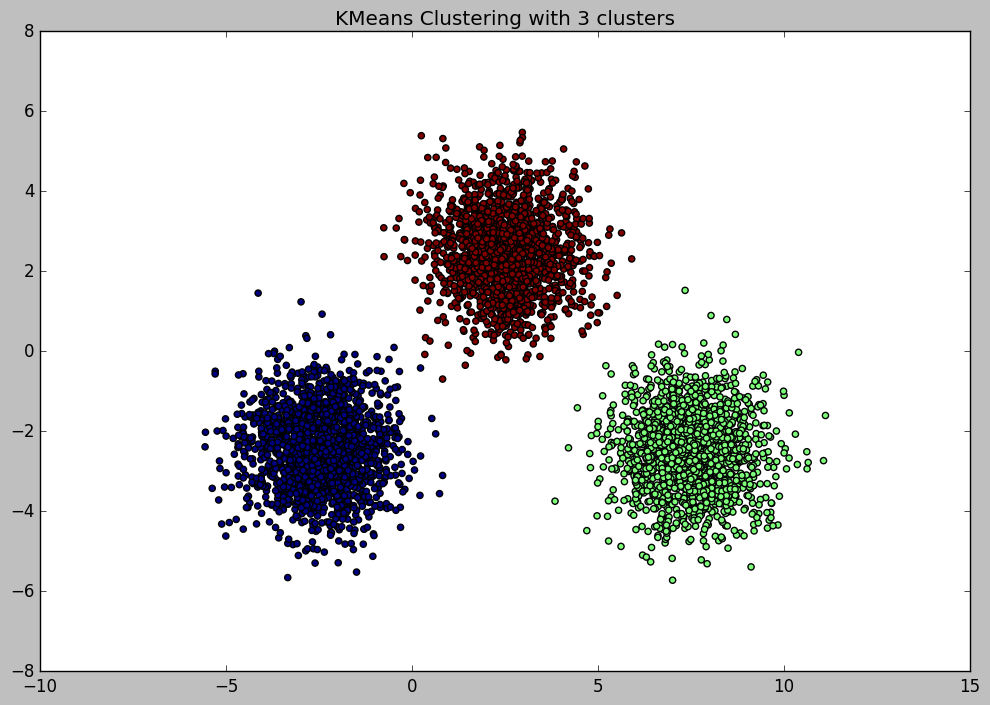

In [7]:
# We draw decision boundaries for clustering using 3 clusters. It allows us to see decision boundaries for clusters.
# We train clustering algorithm and obtain labels for clusters.
# We reinitialize the clustering algorithm using 3 clusters.
kmeans = KMeans(..................)
kmeans.................
labels_3 = kmeans...................

plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=labels_3)
plt.title("KMeans Clustering with 3 clusters")
plt.show()



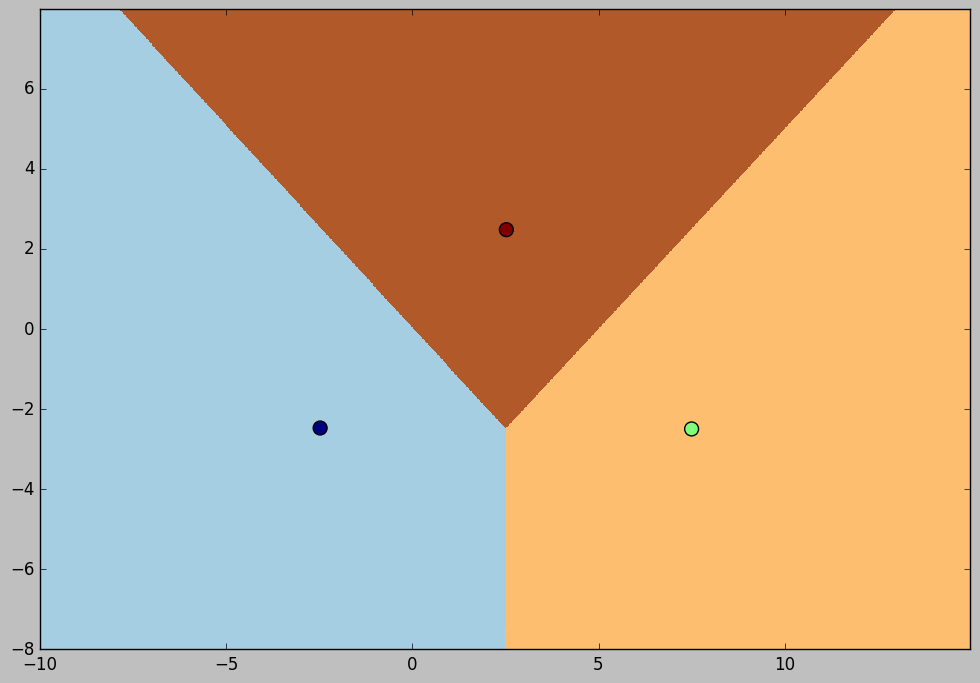

In [8]:
"""
In order to see decision boundaries we are going to create a meshgrid. 
x values are between -10 and 15. y values are between -8 and 8.

"""
#Step size of meshgrid
h = .02
xx, yy = np.meshgrid(np.arange(-10, 15, h), np.arange(-8, 8, h))

# What do we use here? Do we use predict or do we fit first?
Z = kmeans..................(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
# Use scatter for cluster centers and imshow for the whole area
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=kmeans.predict(kmeans.cluster_centers_), s=100)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

## Tahmin

Modeli eğittikten sonra yeni gözlemler için hangi kümeye ait oldukları konusunda tahmin yapabiliriz.

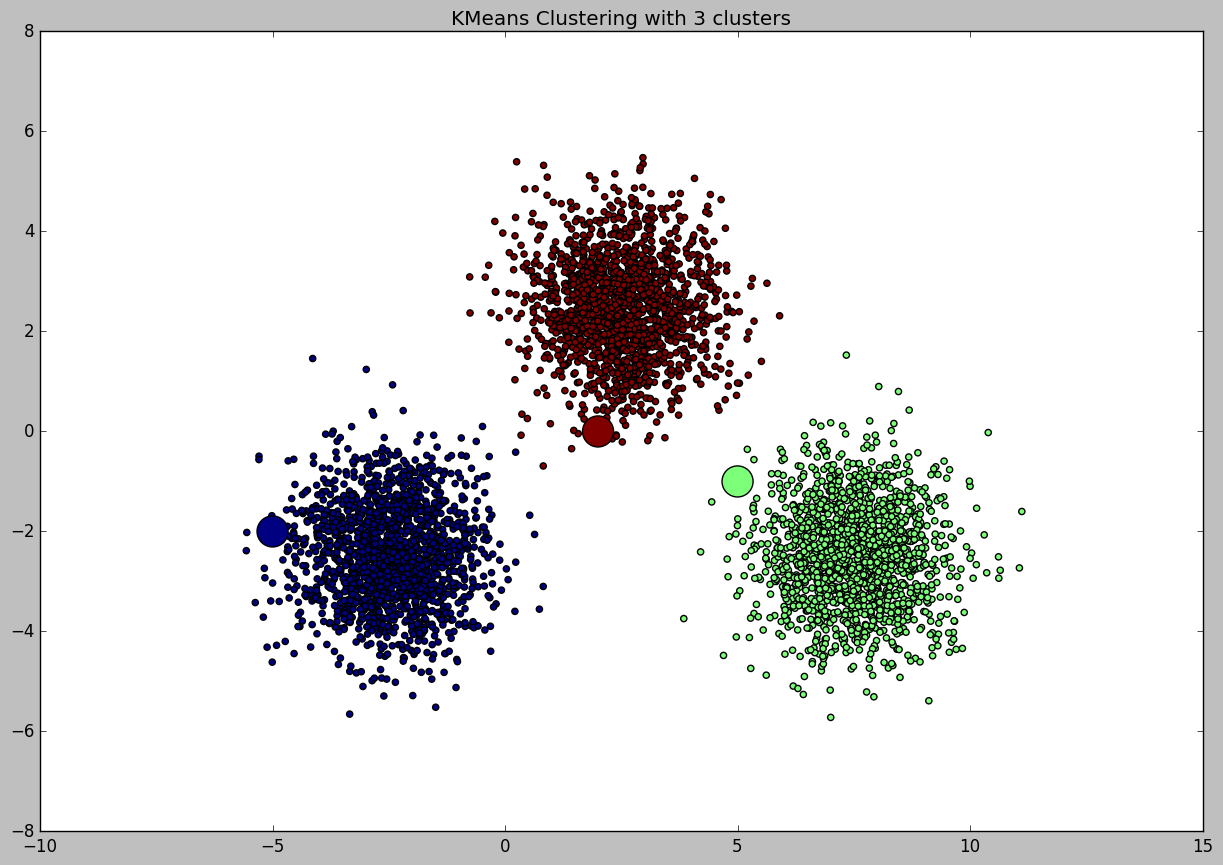

In [9]:
# We create three new observations.
x_new = np.array([[-5,-2],[2,0],[5,-1]])

plt.figure(figsize=(15,10))
# We plot the existing dataset with their clusters
plt.scatter(X[:, 0], X[:, 1], c=labels_3)
# We plot the new observations with their clusters
plt.scatter(x_new[:,0], x_new[:,1], c=kmeans.predict(x_new), s=500)
plt.title("KMeans Clustering with 3 clusters")
plt.show()
